In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import re 
import numpy as np
import seaborn as sns

In [2]:
trash=pd.read_csv(r'C:\Users\91983\Documents\NSS\python\projects\trash-haulers-the-incredibles\data\trash_hauler.csv')
trash

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
0,25270,11/01/17,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1.727970e+06,686779.478089,-86.815392,36.217292
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565,-86.838103,36.213470
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571,-86.885562,36.142923
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923,-86.789170,36.212652
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066,-86.874995,36.154861
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1.781137e+06,632448.551144,-86.633970,36.069130
20222,267126,11/01/19,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1.749711e+06,669201.601569,-86.741242,36.169482
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809,-86.671647,36.185643
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1.785225e+06,627146.400187,-86.620025,36.054637


In [3]:
trash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20226 entries, 0 to 20225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Request Number    20226 non-null  int64  
 1   Date Opened       20226 non-null  object 
 2   Request           20226 non-null  object 
 3   Description       20195 non-null  object 
 4   Incident Address  20217 non-null  object 
 5   Zip Code          20151 non-null  float64
 6   Trash Hauler      19325 non-null  object 
 7   Trash Route       19279 non-null  object 
 8   Council District  20177 non-null  float64
 9   State Plan X      20198 non-null  float64
 10  State Plan Y      20198 non-null  float64
 11  LONGITUDE         20198 non-null  float64
 12  LATITUDE          20198 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 2.0+ MB


In [4]:
trash.isnull().sum()

Request Number        0
Date Opened           0
Request               0
Description          31
Incident Address      9
Zip Code             75
Trash Hauler        901
Trash Route         947
Council District     49
State Plan X         28
State Plan Y         28
LONGITUDE            28
LATITUDE             28
dtype: int64

In [5]:
trash['Request Number']=trash['Request Number'].astype(str)
trash['Date Opened']=pd.to_datetime(trash['Date Opened'],format='%m/%d/%y')

In [6]:
trash=trash.rename(columns={
    'Request Number':'requestno','Date Opened':'dateopened',
    'Description':'description','Incident Address':'address','Zip Code':'zip','Trash Hauler':'company','Trash Route':'trashroute',
    'Council District':'district','State Plan X':'X',"State Plan Y":'Y','LONGITUDE':'lng','LATITUDE':'lat'}).drop(columns=['X','Y'])


In [7]:
trash['zip'] = trash['zip'].astype(str).str.replace('\.0$', '', regex=True).str.zfill(5)
trash['zip'] = trash['zip'].replace('nan', np.nan) 
trash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20226 entries, 0 to 20225
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   requestno    20226 non-null  object        
 1   dateopened   20226 non-null  datetime64[ns]
 2   Request      20226 non-null  object        
 3   description  20195 non-null  object        
 4   address      20217 non-null  object        
 5   zip          20226 non-null  object        
 6   company      19325 non-null  object        
 7   trashroute   19279 non-null  object        
 8   district     20177 non-null  float64       
 9   lng          20198 non-null  float64       
 10  lat          20198 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 1.7+ MB


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\91983\AppData\Local\Temp\ipykernel_36188\3623451942.py:1: SyntaxWarning: invalid escape sequence '\.'
  trash['zip'] = trash['zip'].astype(str).str.replace('\.0$', '', regex=True).str.zfill(5)


In [8]:
trash['company']=trash['company'].replace('Metro','METRO')

In [9]:
trash['Request '].value_counts()

Request 
Trash - Curbside/Alley Missed Pickup    15028
Trash - Backdoor                         2629
Trash Collection Complaint               2312
Damage to Property                        257
Name: count, dtype: int64

In [10]:
missed_trash=trash[(trash['description'].str.contains(
    r'\bmiss\w*\b', case=False, na=False, regex=True
))|(
    trash['Request ']=='Trash - Curbside/Alley Missed Pickup'
)| (trash['description'].str.contains(r'\bpick\w*\b|\bpick\s*up\b',case=False,na=False,regex=True))]
missed_trash['request']='Trash - Curbside/Alley Missed Pickup'
missed_trash=missed_trash.drop(columns=['Request '])
missed_trash=missed_trash.rename(columns={'Request Number':'requestno'})
missed_trash                                       

C:\Users\91983\AppData\Local\Temp\ipykernel_36188\3668635182.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missed_trash['request']='Trash - Curbside/Alley Missed Pickup'


,requestno,dateopened,description,address,zip,company,trashroute,district,lng,lat,request
1,25274,2017-11-01,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218,RED RIVER,4202,1.0,-86.838103,36.213470,Trash - Curbside/Alley Missed Pickup
2,25276,2017-11-01,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209,RED RIVER,4205,20.0,-86.885562,36.142923,Trash - Curbside/Alley Missed Pickup
3,25307,2017-11-01,missed,2603 old matthews rd,37207,WASTE IND,2206,2.0,-86.789170,36.212652,Trash - Curbside/Alley Missed Pickup
4,25312,2017-11-01,Missed the even side of the road.,604 croley dr,37209,RED RIVER,4203,20.0,-86.874995,36.154861,Trash - Curbside/Alley Missed Pickup
5,25317,2017-11-01,left trash cart in middle of driveway instead ...,3602 floral dr,37211,RED RIVER,4304,16.0,-86.733980,36.098140,Trash - Curbside/Alley Missed Pickup
...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,2019-11-01,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013,RED RIVER,4502,32.0,-86.633970,36.069130,Trash - Curbside/Alley Missed Pickup
20222,267126,2019-11-01,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206,METRO,9508,6.0,-86.741242,36.169482,Trash - Curbside/Alley Missed Pickup
20223,267130,2019-11-01,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214,RED RIVER,1502,15.0,-86.671647,36.185643,Trash - Curbside/Alley Missed Pickup
20224,267134,2019-11-01,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013,RED RIVER,4502,32.0,-86.620025,36.054637,Trash - Curbside/Alley Missed Pickup


In [11]:
missed_trash['company'].value_counts(normalize=True)*100

company
RED RIVER    75.223227
METRO        17.981693
WASTE IND     6.795081
Name: proportion, dtype: float64

In [12]:
missed_redriver=missed_trash[missed_trash['company']=='RED RIVER']
missed_metro=missed_trash[missed_trash['company']=='METRO']
missed_wasteind=missed_trash[missed_trash['company']=='WASTE IND']

In [13]:
redriver_address=pd.DataFrame(missed_redriver['address'].value_counts()).reset_index()
redriver_address=redriver_address[redriver_address['count']>1]
redriver_address['chronic']=redriver_address['count']-1
redriver_address['chronic'].sum()*200

771400

In [14]:
metro_address=pd.DataFrame(missed_metro['address'].value_counts()).reset_index()
metro_address=metro_address[metro_address['count']>1]
metro_address['chronic']=metro_address['count']-1
metro_address['chronic'].sum()*200

172200

In [15]:
wasteind_address=pd.DataFrame(missed_wasteind['address'].value_counts()).reset_index()
wasteind_address=wasteind_address[wasteind_address['count']>1]
wasteind_address['chronic']=wasteind_address['count']-1
wasteind_address['chronic'].sum()*200

58800

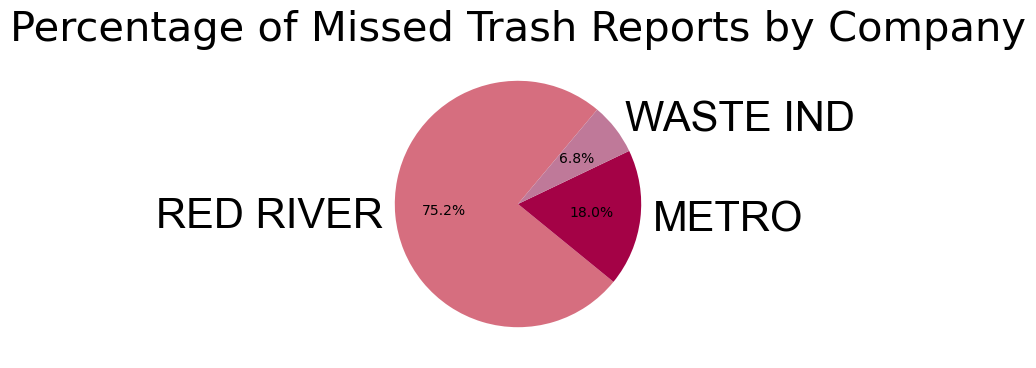

In [16]:

# The 'missed_trash' DataFrame must exist for this code to run.
# Here is a sample DataFrame to make the code runnable for demonstration purposes:
# missed_trash = pd.DataFrame({'company': ['Red River', 'Metro', 'Waste Ind', 'Red River', 'Metro', 'Red River', 'Waste Ind', 'Metro']})

# Assuming 'missed_trash' is defined:
company_percentages = missed_trash['company'].value_counts(normalize=True) * 100
custom_colors = ['#d66e7f', '#a40246', '#bf7999']

plt.figure(figsize=(4, 4))

# Capture all three return values from plt.pie
# wedges store the pie chart segments; labels store the text objects; autopcts store the percentage text
wedges, labels, autopcts = plt.pie(
    company_percentages,
    labels=company_percentages.index,
    autopct='%1.1f%%',
    startangle=50,
    colors=custom_colors
)

# Set the font properties for each label text object
for label in labels:
    label.set_fontsize(30)  # Set the desired font size (e.g., 30 points)
    label.set_fontname('Arial')  # Optional: Set the font family

plt.title('Percentage of Missed Trash Reports by Company', fontsize=30)

# Display the plot
plt.show()

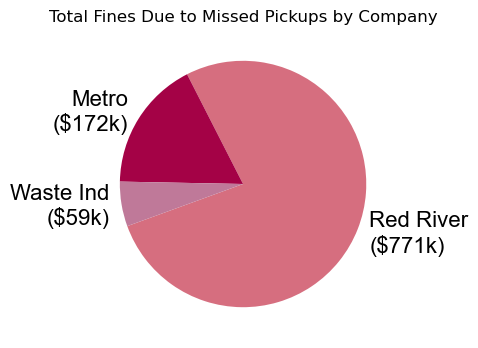

In [17]:
df= {'company': ['Red River', 'Metro', 'Waste Ind'],
    'total_fines_due_to_missed_pickup': [771400,172200,58800]}
df =pd.DataFrame(df)
custom_colors = ['#d66e7f', '#a40246', '#bf7999']
def format_currency(value):
    if value >= 1e6:
        return f'${value/1e6:.0f}M'
    elif value >= 1e3:
        return f'${value/1e3:.0f}k'
    else:
        return f'${value:.0f}'
chart_labels = []
for index, row in df.iterrows():
    formatted_value = format_currency(row['total_fines_due_to_missed_pickup'])
    label = f"{row['company']}\n({formatted_value})"
    chart_labels.append(label)

plt.figure(figsize=(4,4))
# Capture the text objects returned by plt.pie to manually set their properties
wedges, labels = plt.pie(
    df['total_fines_due_to_missed_pickup'],
    labels=chart_labels,
    colors=custom_colors,
    startangle=200
)
plt.title('Total Fines Due to Missed Pickups by Company');

# Set the font properties for each label
for label in labels:
    label.set_fontsize(16) # Set the desired font size
    label.set_fontname('Arial') # Optional: Set the font family

plt.show()


In [18]:
missed_trash['request'].value_counts()

request
Trash - Curbside/Alley Missed Pickup    18622
Name: count, dtype: int64

In [19]:
trash=trash.rename(columns={'Request ':'request'})
trash

,requestno,dateopened,request,description,address,zip,company,trashroute,district,lng,lat
0,25270,2017-11-01,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207,RED RIVER,3205,2.0,-86.815392,36.217292
1,25274,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218,RED RIVER,4202,1.0,-86.838103,36.213470
2,25276,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209,RED RIVER,4205,20.0,-86.885562,36.142923
3,25307,2017-11-01,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207,WASTE IND,2206,2.0,-86.789170,36.212652
4,25312,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209,RED RIVER,4203,20.0,-86.874995,36.154861
...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,2019-11-01,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013,RED RIVER,4502,32.0,-86.633970,36.069130
20222,267126,2019-11-01,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206,METRO,9508,6.0,-86.741242,36.169482
20223,267130,2019-11-01,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214,RED RIVER,1502,15.0,-86.671647,36.185643
20224,267134,2019-11-01,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013,RED RIVER,4502,32.0,-86.620025,36.054637


In [20]:
requests_to_exclude = missed_trash['requestno']
rows_to_keep= ~trash['requestno'].isin(requests_to_exclude)
exceptmissed_trash = trash[rows_to_keep].reset_index(drop=True)
exceptmissed_trash

,requestno,dateopened,request,description,address,zip,company,trashroute,district,lng,lat
0,25270,2017-11-01,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207,RED RIVER,3205,2.0,-86.815392,36.217292
1,25325,2017-11-01,Damage to Property,Trash/emptied Wednesday & now metal black-mail...,4721 Chalmers Dr,37215,RED RIVER,3303,34.0,-86.819640,36.080729
2,25366,2017-11-01,Trash Collection Complaint,trash truck took cart \n3 guys on truck did no...,2200 osage st,37208,METRO,9201,21.0,-86.812692,36.176913
3,25465,2017-11-01,Trash Collection Complaint,A resident is complaining that a trash truck r...,1414 Old Hickory Blvd,37207,NaN,NaN,3.0,-86.779556,36.284699
4,25743,2017-11-02,Trash Collection Complaint,Resident is very upset- Red River emptied only...,732 Ridgeview Ct,37013,RED RIVER,4403,31.0,-86.708531,36.034471
...,...,...,...,...,...,...,...,...,...,...,...
1599,266348,2019-10-31,Damage to Property,Trash bin was dropped by trash guys,"5225 Tusculum Ct, Nashville, TN 37211, United ...",37211,RED RIVER,4404,27.0,-86.698105,36.051330
1600,266637,2019-10-31,Damage to Property,truck was turning around in dead end and ran i...,"275 April Ln, Nashville, TN 37211, United States",37211,RED RIVER,3403,27.0,-86.708735,36.056431
1601,266891,2019-11-01,Trash Collection Complaint,"garbage truck is cutting the corner too close,...","1997 Nashboro Blvd, Nashville, Tennessee, 37217",37217,RED RIVER,2505,29.0,-86.633606,36.089342
1602,267069,2019-11-01,Trash Collection Complaint,trash truck broke a limb out of her tree and l...,"105 Lake Side Ct, Nashville, Tennessee, 37217",37217,RED RIVER,3501,29.0,-86.606646,36.092400


In [21]:
exceptmissed_trash['request'].value_counts()

request
Trash Collection Complaint    1005
Trash - Backdoor               382
Damage to Property             217
Name: count, dtype: int64

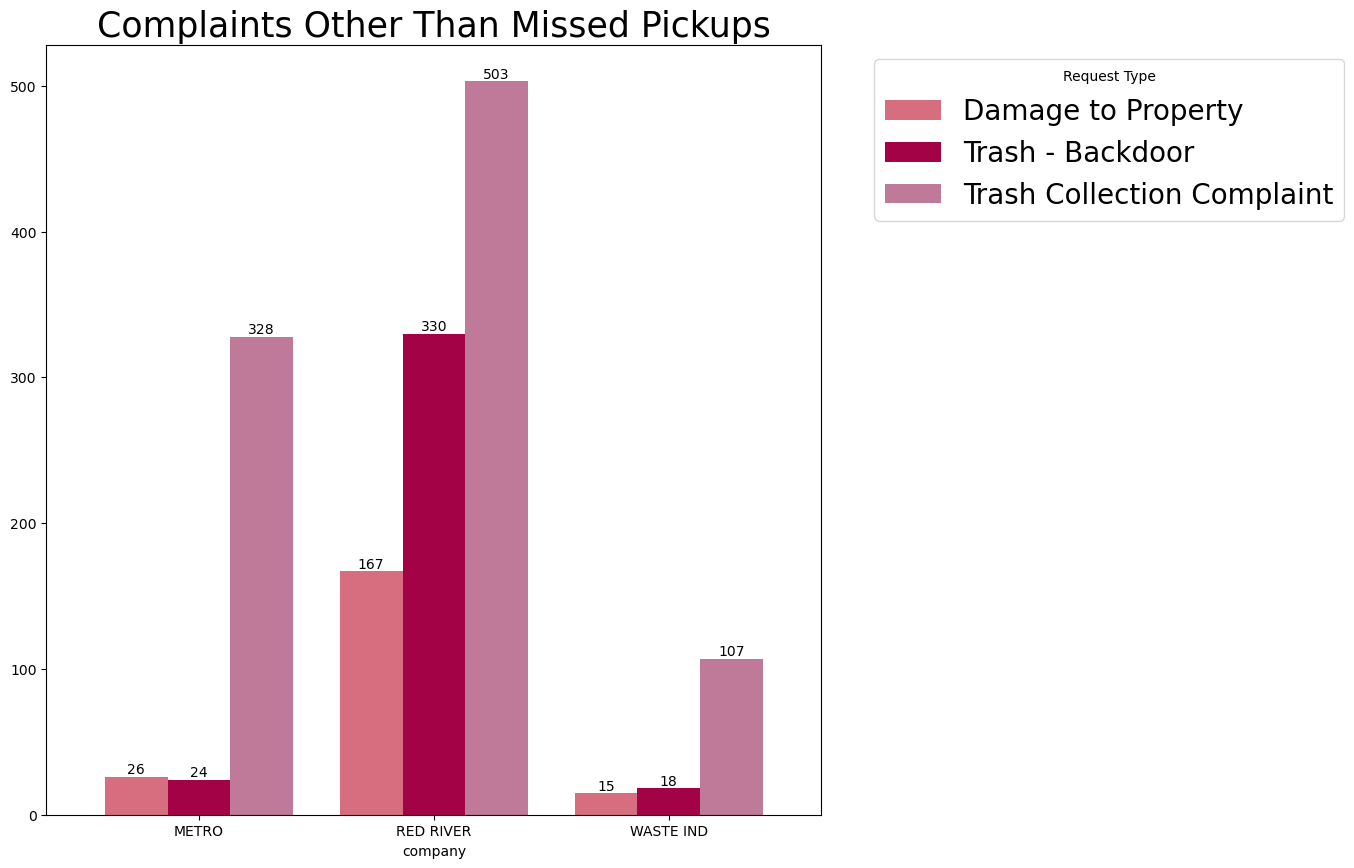

In [70]:
df = exceptmissed_trash.groupby(['company', 'request']).size().unstack(fill_value=0)
custom_colors = ['#d66e7f', '#a40246', '#bf7999']
ax =df.plot(kind='bar', figsize=(10,10), width=0.8,color=custom_colors)
plt.title('Complaints Other Than Missed Pickups',fontsize=25)
plt.xticks(rotation=0)
plt.legend(title='Request Type', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=20)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

In [23]:
trash1=pd.concat([missed_trash,exceptmissed_trash],ignore_index=True)
trashcsv=trash1.to_csv(r'C:\Users\91983\Documents\NSS\python\projects\trash-haulers-the-incredibles\data\trash.csv',index=False)

In [24]:
trash1_redriver=trash1[trash1['company']=='RED RIVER']
trash1_metro=trash1[trash1['company']=='METRO']
trash1_wasteind=trash1[trash1['company']=='WASTE IND']

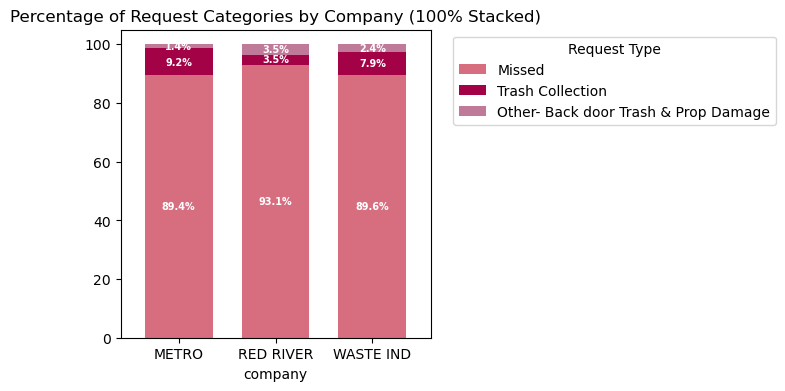

In [65]:
request_category_rename = {'Trash - Curbside/Alley Missed Pickup': 'Missed','Trash Collection Complaint': 'Trash Collection','Trash - Backdoor': 'Other- Back door Trash & Prop Damage','Damage to Property': 'Other- Back door Trash & Prop Damage'}
trash1.loc[:, 'request_renamed'] = trash1['request'].replace(request_category_rename)
grouped_counts = trash1.groupby(['company', 'request_renamed']).size().unstack(fill_value=0)
company_totals = grouped_counts.sum(axis=1)
percentage_data = grouped_counts.div(company_totals, axis=0) * 100
custom_colors = ['#d66e7f', '#a40246', '#bf7999', '#e61737']
def sort_row(row, ascending=True):
    return row.sort_values(ascending=ascending)
sorted_percentage_data = percentage_data.apply(sort_row, axis=1, ascending=False)
ax = sorted_percentage_data.plot(kind='bar',stacked=True,figsize=(4, 4),color=custom_colors,width=0.7)
plt.title('Percentage of Request Categories by Company (100% Stacked)')
plt.xticks(rotation=0)
plt.legend(title='Request Type', bbox_to_anchor=(1.05, 1), loc='upper left')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2., y + height / 2., f'{height:.1f}%', ha='center', va='center',color='white', fontsize=7,fontweight='bold')

In [26]:
trash1['dateopened'].min()

Timestamp('2017-11-01 00:00:00')

In [27]:
trash1['dateopened'].max()

Timestamp('2019-11-01 00:00:00')

In [28]:
missed_trash=trash1[trash1['request']=='Trash - Curbside/Alley Missed Pickup']
redriver =missed_trash.loc[missed_trash['company'] == 'RED RIVER']
metro=missed_trash.loc[missed_trash['company'] == 'METRO']
wasteind=missed_trash.loc[missed_trash['company'] == 'WASTE IND']
redriver_address=pd.DataFrame(redriver['address'].value_counts()).reset_index()
redriver_address_10=redriver_address[redriver_address['count']>10]
metro_address=pd.DataFrame(metro['address'].value_counts()).reset_index()
metro_address_5=metro_address[metro_address['count']>5]
wasteind_address=pd.DataFrame(wasteind['address'].value_counts()).reset_index()
wasteind_address_2=wasteind_address[wasteind_address['count']>2]

In [29]:
wasteind_address

,address,count
0,518 monroe st,8
1,"613 Troy Ct, Nashville, TN 37207, United States",8
2,1011 elm hill pike,7
3,"80 Lyle Ln, Nashville, TN 37210, United States",7
4,15 Hermitage Ave,7
...,...,...
911,1727 3rd Ave N A,1
912,"1315 6th Ave N, Nashville, TN 37208, United St...",1
913,1317 6th Ave N,1
914,607 garfield st,1


[]

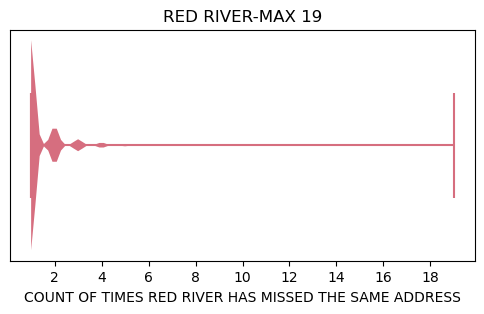

In [30]:
plt.figure(figsize=(6, 3))
vp = plt.violinplot(redriver_address['count'], vert=False, showmedians=True, showextrema=True)
plt.title('RED RIVER-MAX 19')
plt.xlabel('COUNT OF TIMES RED RIVER HAS MISSED THE SAME ADDRESS')
color_hex = '#d66e7f'
for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians', 'cquartiles'):
    if partname in vp:
        vp[partname].set_edgecolor(color_hex)
for pc in vp['bodies']:
    pc.set_facecolor(color_hex)
    pc.set_alpha(1.0) 
ax = plt.gca()
ax.xaxis.set_major_locator(mtick.MaxNLocator(integer=True))
ax.set_yticks([]) 

[]

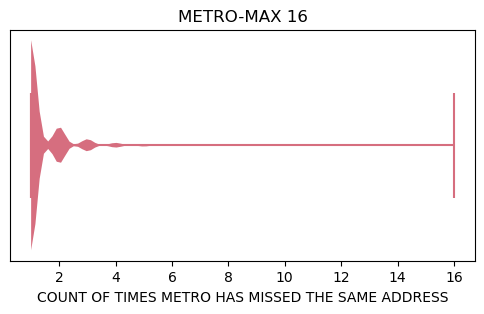

In [31]:
plt.figure(figsize=(6, 3))
vp = plt.violinplot(metro_address['count'], vert=False, showmedians=True, showextrema=True)
plt.title('METRO-MAX 16')
plt.xlabel('COUNT OF TIMES METRO HAS MISSED THE SAME ADDRESS')
for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians', 'cquartiles'):
    if partname in vp:
        vp[partname].set_edgecolor(color_hex)
color_hex = '#d66e7f'
for pc in vp['bodies']:
    pc.set_facecolor(color_hex)
    pc.set_alpha(1.0) 
ax = plt.gca()
ax.xaxis.set_major_locator(mtick.MaxNLocator(integer=True))
ax.set_yticks([]) 

[]

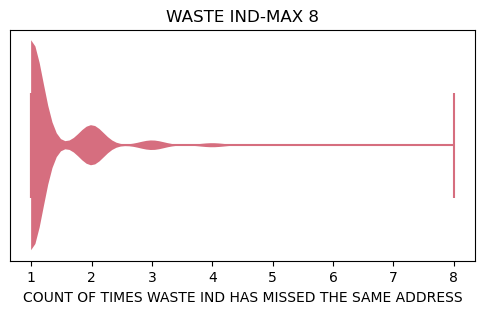

In [32]:
plt.figure(figsize=(6, 3))
vp = plt.violinplot(wasteind_address['count'], vert=False, showmedians=True, showextrema=True)
plt.title('WASTE IND-MAX 8')
plt.xlabel('COUNT OF TIMES WASTE IND HAS MISSED THE SAME ADDRESS')
for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians', 'cquartiles'):
    if partname in vp:
        vp[partname].set_edgecolor(color_hex)
color_hex = '#d66e7f'
for pc in vp['bodies']:
    pc.set_facecolor(color_hex)
    pc.set_alpha(1.0) 
ax = plt.gca()
ax.xaxis.set_major_locator(mtick.MaxNLocator(integer=True))
ax.set_yticks([]) 

In [33]:
trash1_redriver.head(2)

,requestno,dateopened,description,address,zip,company,trashroute,district,lng,lat,request
0,25274,2017-11-01,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218,RED RIVER,4202,1.0,-86.838103,36.213470,Trash - Curbside/Alley Missed Pickup
1,25276,2017-11-01,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209,RED RIVER,4205,20.0,-86.885562,36.142923,Trash - Curbside/Alley Missed Pickup


In [34]:
trash1_redriver.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14395 entries, 0 to 20225
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   requestno    14395 non-null  object        
 1   dateopened   14395 non-null  datetime64[ns]
 2   description  14376 non-null  object        
 3   address      14394 non-null  object        
 4   zip          14395 non-null  object        
 5   company      14395 non-null  object        
 6   trashroute   14393 non-null  object        
 7   district     14379 non-null  float64       
 8   lng          14390 non-null  float64       
 9   lat          14390 non-null  float64       
 10  request      14395 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 1.3+ MB


In [35]:
trash1_redriver_antioch37013=trash1_redriver[(trash1_redriver['zip']=='37013')&(trash1_redriver['trashroute']=='3503')]
trash1_redriver_antioch37013

,requestno,dateopened,description,address,zip,company,trashroute,district,lng,lat,request
130,26318,2017-11-06,Curb/trash miss last Friday. ? wants cart empt...,1416 Forrestal Way,37013,RED RIVER,3503,33.0,-86.599426,36.069875,Trash - Curbside/Alley Missed Pickup
193,27385,2017-11-12,Trash was not picked up on designated day. Met...,3288 New Towne rd,37013,RED RIVER,3503,33.0,-86.604779,36.071940,Trash - Curbside/Alley Missed Pickup
304,28982,2017-11-20,Upset trash/out night before and still getting...,3401 Country Way Rd,37013,RED RIVER,3503,33.0,-86.602031,36.074749,Trash - Curbside/Alley Missed Pickup
359,29899,2017-11-27,cust says the entire street was missed,3604 green garden ct,37013,RED RIVER,3503,33.0,-86.600025,36.072085,Trash - Curbside/Alley Missed Pickup
537,32481,2017-12-08,trash was missed for the street,3436 Towne Village Rd,37013,RED RIVER,3503,33.0,-86.599604,36.074950,Trash - Curbside/Alley Missed Pickup
...,...,...,...,...,...,...,...,...,...,...,...
18163,261463,2019-10-18,I put my trash and recycling out. Neither were...,"1205 Placid Ct, Nashville, TN 37013, United St...",37013,RED RIVER,3503,33.0,-86.596272,36.074340,Trash - Curbside/Alley Missed Pickup
18753,47064,2018-02-16,Says that she had boxes in her trash cart and ...,708 Ashwell Close,37013,RED RIVER,3503,33.0,-86.580225,36.071759,Trash Collection Complaint
19421,134361,2019-01-24,paid service,"1129 Burlingame Ct, Nashville, TN 37013, Unite...",37013,RED RIVER,3503,33.0,-86.597566,36.072656,Trash - Backdoor
19761,175686,2019-04-26,1,"6330 Mt View Rd, Nashville, TN 37013, United S...",37013,RED RIVER,3503,33.0,-86.591716,36.070291,Trash - Backdoor


Text(0.5, 1.0, 'Frequency of Missed Pickups by Year')

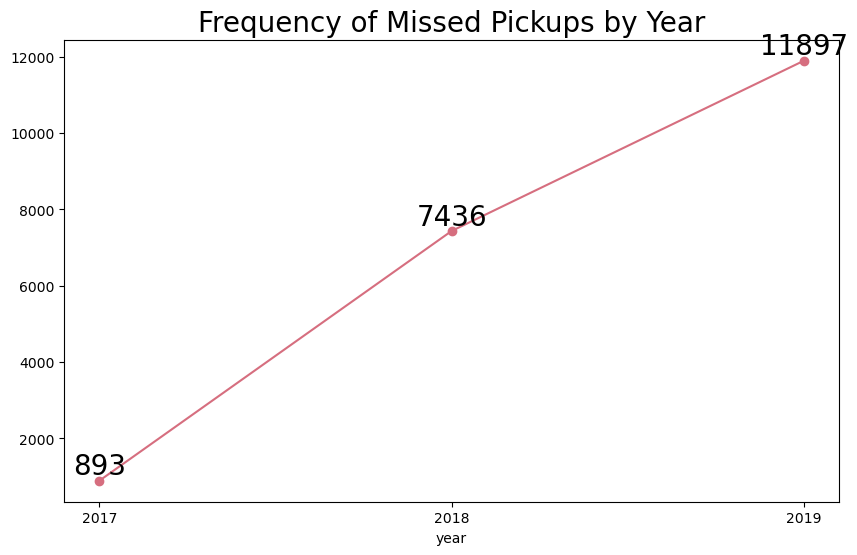

In [46]:
trash1['year'] = trash1['dateopened'].dt.year
years = trash1['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
years.plot(kind='line', marker='o', color='#d66e7f')
for year, count in zip(years.index, years.values):
    plt.text(year, count, str(count), ha='center', va='bottom', fontsize=20)
plt.xticks(years.index.astype(int))
plt.title('Frequency of Missed Pickups by Year',fontsize=20)

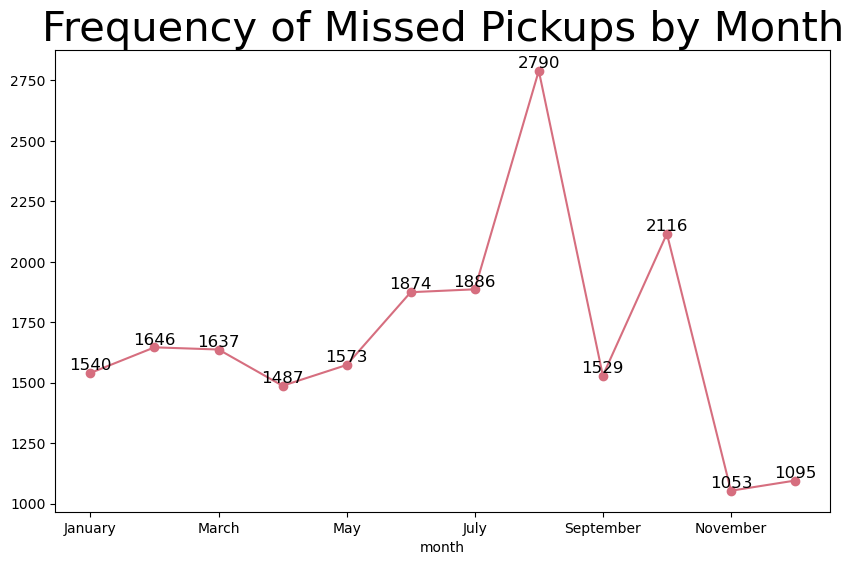

In [55]:
trash1['month'] = trash1['dateopened'].dt.month_name()
month_order = [ 'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December']
month_counts =trash1['month'].astype(pd.CategoricalDtype(categories=month_order, ordered=True)).value_counts().sort_index()
plt.figure(figsize=(10, 6))
month_counts.plot(kind='line', marker='o',color='#d66e7f')
for index, count in enumerate(month_counts.values):
    plt.text(index, count, str(count), ha='center', va='bottom', fontsize=12)
plt.title('Frequency of Missed Pickups by Month',fontsize=30)
plt.xticks(rotation=0);

Text(0.5, 0, 'Weekday')

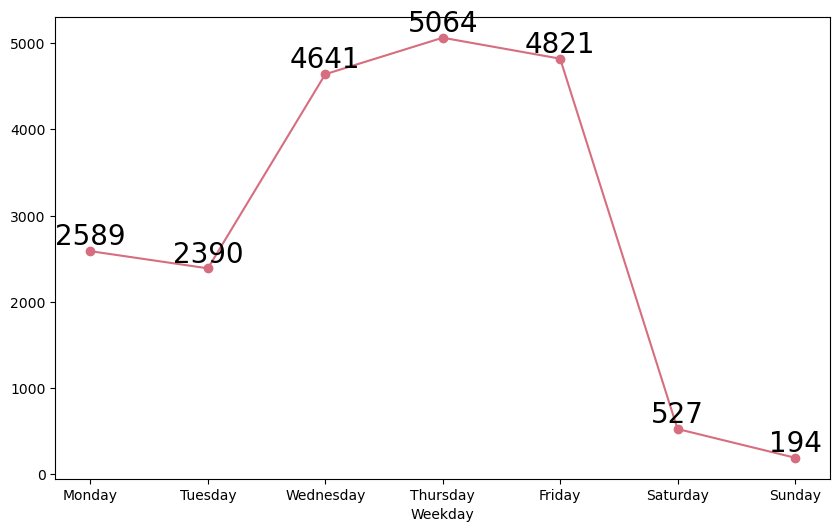

In [63]:
trash1['weekday'] = trash1['dateopened'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = trash1['weekday'].astype(pd.CategoricalDtype(categories=weekday_order, ordered=True)).value_counts().sort_index()
plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='line', marker='o',color='#d66e7f')
for index, count in enumerate(weekday_counts.values):
    plt.text(index, count, str(count), ha='center', va='bottom', fontsize=20)
plt.xlabel('Weekday')

In [83]:
df=pd.DataFrame(trash1_redriver['address'].value_counts().reset_index())
df1=trash1_redriver[['requestno','dateopened','address']]
merge=pd.merge(df1,df,on='address',how='inner')
merge=merge.sort_values(['count','dateopened'],ascending=[False,True])
merge

,requestno,dateopened,address,count
312,30703,2017-11-29,3710 N NATCHEZ CT,19
375,32016,2017-12-06,3710 N NATCHEZ CT,19
890,41892,2018-01-25,3710 N NATCHEZ CT,19
1902,61601,2018-04-19,3710 N NATCHEZ CT,19
2084,65235,2018-05-04,3710 N NATCHEZ CT,19
...,...,...,...,...
13389,267121,2019-11-01,"2709 Crestdale Dr, Nashville, TN 37214, United...",1
13393,267137,2019-11-01,"604 Somerset Ct, Nashville, TN 37217, United S...",1
14391,266891,2019-11-01,"1997 Nashboro Blvd, Nashville, Tennessee, 37217",1
14392,267069,2019-11-01,"105 Lake Side Ct, Nashville, Tennessee, 37217",1


In [87]:
results = []

for add, group in redriver.groupby('address'):
    dates = group['dateopened'].sort_values().reset_index(drop=True)

  
    start = 0
    for end in range(len(dates)):
      
        while dates[end] - dates[start] > pd.Timedelta(days=180):
            start += 1
        
  
        count = end - start + 1
        
        if count >= 3:
            results.append({
                'address': add,
                'Window Start': dates[start],
                'Window End': dates[end],
                'Missed Pickups': count,
                'Fine Issued': 1500
            })


fine_df = pd.DataFrame(results)
fine_df

,address,Window Start,Window End,Missed Pickups,Fine Issued
0,"1000 Trevino Pl, Antioch, Tennessee, 37013",2019-08-12,2019-10-28,3,1500
1,1005 noelton ave,2018-02-12,2018-05-17,3,1500
2,1005 noelton ave,2018-02-12,2018-08-02,4,1500
3,"1006 Grandview Dr, Nashville, TN 37204, United...",2019-06-05,2019-07-11,3,1500
4,"1006 Grandview Dr, Nashville, TN 37204, United...",2019-06-05,2019-07-26,4,1500
...,...,...,...,...,...
1324,"927 Woods Lake Dr, Nashville, TN 37115, United...",2019-07-11,2019-09-19,3,1500
1325,"954 Battery Ln, Nashville, TN 37220, United St...",2019-05-31,2019-09-23,3,1500
1326,"954 Battery Ln, Nashville, TN 37220, United St...",2019-05-31,2019-10-01,4,1500
1327,"960 44th Ave N, Nashville, TN 37209, United St...",2018-07-19,2018-11-26,3,1500


In [88]:
fine_df['Fine Issued'].sum()

1993500

In [89]:
results = []

for add, group in metro.groupby('address'):
    dates = group['dateopened'].sort_values().reset_index(drop=True)

  
    start = 0
    for end in range(len(dates)):
      
        while dates[end] - dates[start] > pd.Timedelta(days=180):
            start += 1
        
  
        count = end - start + 1
        
        if count >= 3:
            results.append({
                'address': add,
                'Window Start': dates[start],
                'Window End': dates[end],
                'Missed Pickups': count,
                'Fine Issued': 1500
            })


fine_df = pd.DataFrame(results)
fine_df

,address,Window Start,Window End,Missed Pickups,Fine Issued
0,1011 12TH AVE S,2019-09-05,2019-09-05,3,1500
1,1011 stockell st,2018-01-25,2018-02-07,3,1500
2,1011 stockell st,2018-01-25,2018-02-16,4,1500
3,"1027 Burchwood Ave, Nashville, TN 37216, Unite...",2019-01-04,2019-01-08,3,1500
4,109 Bonnie Briar Ln,2018-06-22,2018-08-17,3,1500
...,...,...,...,...,...
282,"912 Archer St, Nashville, TN 37203, United States",2019-07-12,2019-08-08,4,1500
283,"923 Silverdene Pl, Nashville, TN 37206, United...",2019-02-21,2019-06-03,3,1500
284,936 Cahal Ave,2017-11-06,2018-01-09,3,1500
285,936 Cahal Ave,2017-11-06,2018-04-13,4,1500


In [90]:
fine_df['Fine Issued'].sum()

430500

In [91]:
results = []

for add, group in wasteind.groupby('address'):
    dates = group['dateopened'].sort_values().reset_index(drop=True)

  
    start = 0
    for end in range(len(dates)):
      
        while dates[end] - dates[start] > pd.Timedelta(days=180):
            start += 1
        
  
        count = end - start + 1
        
        if count >= 3:
            results.append({
                'address': add,
                'Window Start': dates[start],
                'Window End': dates[end],
                'Missed Pickups': count,
                'Fine Issued': 1500
            })


fine_df = pd.DataFrame(results)
fine_df

,address,Window Start,Window End,Missed Pickups,Fine Issued
0,1011 elm hill pike,2018-02-26,2018-07-24,3,1500
1,1011 elm hill pike,2018-04-20,2018-09-17,3,1500
2,1011 elm hill pike,2018-07-24,2018-10-30,3,1500
3,1011 elm hill pike,2018-10-30,2019-04-09,3,1500
4,"1108 Chapel Ave, Nashville, TN 37206, United S...",2019-06-01,2019-08-09,3,1500
...,...,...,...,...,...
64,"80 Lyle Ln, Nashville, TN 37210, United States",2019-06-27,2019-10-04,4,1500
65,910 w greenwood ave,2018-07-18,2018-08-31,3,1500
66,910 w greenwood ave,2018-07-18,2018-10-08,4,1500
67,926 32nd Ave N B,2018-01-11,2018-04-20,3,1500


In [92]:
fine_df['Fine Issued'].sum()

103500

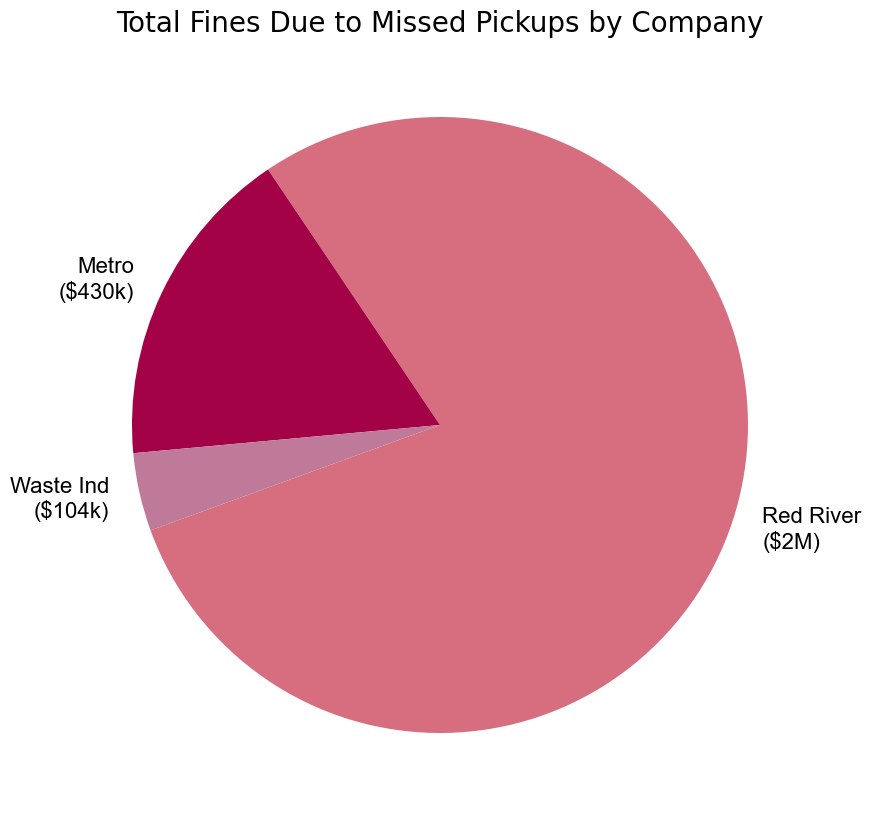

In [95]:
df= {'company': ['Red River', 'Metro', 'Waste Ind'],
    'total_fines_due_to_missed_pickup': [1993500,430500,103500]}
df =pd.DataFrame(df)
custom_colors = ['#d66e7f', '#a40246', '#bf7999']
def format_currency(value):
    if value >= 1e6:
        return f'${value/1e6:.0f}M'
    elif value >= 1e3:
        return f'${value/1e3:.0f}k'
    else:
        return f'${value:.0f}'
chart_labels = []
for index, row in df.iterrows():
    formatted_value = format_currency(row['total_fines_due_to_missed_pickup'])
    label = f"{row['company']}\n({formatted_value})"
    chart_labels.append(label)

plt.figure(figsize=(10,10))
# Capture the text objects returned by plt.pie to manually set their properties
wedges, labels = plt.pie(
    df['total_fines_due_to_missed_pickup'],
    labels=chart_labels,
    colors=custom_colors,
    startangle=200
)
plt.title('Total Fines Due to Missed Pickups by Company',fontsize=20);

# Set the font properties for each label
for label in labels:
    label.set_fontsize(16) # Set the desired font size
    label.set_fontname('Arial') # Optional: Set the font family

plt.show()